In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from PIL import Image
%matplotlib inline

In [17]:
roi_im = Image.open('G:/Xinhua/ROI/A/01-LC-roi.bmp')
ori_im = Image.open('G:/Xinhua/ROI/A/02-LC-ser.bmp')

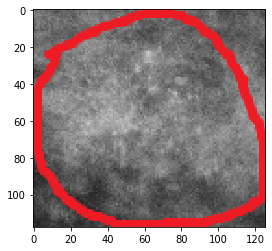

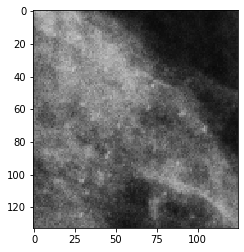

In [18]:
plt.imshow(roi_im)
plt.figure()
plt.imshow(ori_im)

In [19]:
roi_size = (ori_im.size);
roi_size

(125, 133)

In [20]:
def pixel_wanted(pix):
    return pix[0]>200

In [21]:
# im = Image.open('G:/Xinhua/ROI/A/01-LC-roi.bmp')
# plt.imshow(im)

# plt.imshow(im)

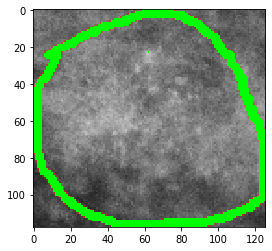

In [22]:
# im = Image.open('G:/Xinhua/ROI/A/02-LC-roi.bmp')
im = roi_im
coordinateList = []
top_pixel = (0,0,0)
for x in range(im.size[0]):
    flag=False
    for y in range(im.size[1]):
        #当前像素点
        current_pixel = im.getpixel((x,y))
        last_pixel = im.getpixel((x,y-1)) if y>0 else top_pixel
        if pixel_wanted(current_pixel)and not pixel_wanted(last_pixel):
            flag = True
        if flag and not pixel_wanted(current_pixel):
            flag = False
        if(flag):
            coordinateList.append((x,y))
        
        
# plt.imshow(im)
for coordinate in coordinateList:
    im.putpixel(coordinate,(0,255,0))
            
plt.imshow(im)           

In [8]:
# for coordinate in coordinateList:
#     print(coordinate)

In [9]:
# min_max_coordinate_list=[0]*im.size[0]*2
# for coordinate in coordinateList:
#     min_max_coordinate_list[coordinate[0]*2]=coordinate[0]*2
#     min_max_coordinate_list[coordinate[0]*2+1]=coordinate[0]*2+1
# print(min_max_coordinate_list)

In [10]:
min_max_coordinate_list=[]
for i in range(im.size[0]):
    for coordinate in coordinateList:
        if coordinate[0]==i:
            min = coordinate[1]
            max = coordinate[1]
#             print("初始化的min和max",(min,max))
            break
    for coordinate in coordinateList:
        if coordinate[0]==i:
#             print("找到横座标相同点为",coordinate)
            if coordinate[1]>max:
#                 print("找到新的最大纵座标为",coordinate[1])
                max = coordinate[1]
    min_max_coordinate_list.append(min)
    min_max_coordinate_list.append(max)
# print(min_max_coordinate_list)

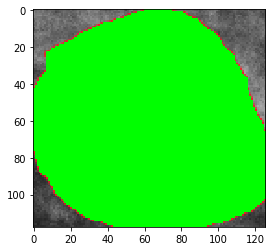

In [11]:
for x in range(im.size[0]):
    for y in range(im.size[1]):
        min = min_max_coordinate_list[x*2]
        max = min_max_coordinate_list[x*2+1]
#         print(min,max)
        if min<y<max:
            im.putpixel((x,y),(0,255,0))
            
plt.imshow(im)  

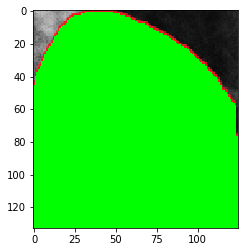

In [12]:
im = Image.open('G:/Xinhua/ROI/A/02-LC-roi.bmp')
coordinateList = []
for x in range(im.size[0]):
    flag=False
    for y in range(im.size[1]):
        #当前像素点
        current_pixel = im.getpixel((x,y))
        last_pixel = im.getpixel((x,y-1)) if y>0 else (0,0,0)
        if flag:
            coordinateList.append((x,y))
            if pixel_wanted(current_pixel) and not pixel_wanted(last_pixel):
                flag = False
        if pixel_wanted(current_pixel)and not pixel_wanted(last_pixel):
            flag = True
        
        
# plt.imshow(im)
for coordinate in coordinateList:
    im.putpixel(coordinate,(0,255,0))
            
plt.imshow(im)    